In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [0]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
X_train = pd.read_csv('/content/drive/My Drive/Ride_Fare/train.csv',index_col='tripid',)

In [4]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct


In [1061]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 non-null  float64
 9   drop_lat                   17176 non-null  float64
 10  drop_lon                   17176 non-null  float64
 11  fare                       17039 non-null  float64
 12  label                      17176 non-null  object 
dtypes: float64(10), object(3)
memory u

In [0]:
num_rows=X_train.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(X_train.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(X_train.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

X_train['calc_duration'] = duration_list


In [0]:
'''
num_rows=X_train.shape[0]
hour_list = []
for i in range(num_rows):
  hour = datetime.strptime(X_train.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M').hour
  hour_list.append(hour)

X_train['hour'] = hour_list
'''

In [0]:
X_train.drop('drop_time',axis = 1,inplace=True)
X_train.drop('pickup_time',axis = 1,inplace=True)
#X_train.drop('additional_fare',axis = 1,inplace=True)
#X_train.drop('meter_waiting_till_pickup',axis = 1,inplace=True)


In [29]:
X_train.corr()

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,calc_duration
additional_fare,1.000000,0.197605,0.199604,0.002355,0.009124,0.000621,0.004644,0.001539,0.315285,-0.000649
meter_waiting,0.197605,1.000000,0.999474,0.030447,-0.016171,-0.014211,-0.010117,-0.007905,0.870126,0.468704
meter_waiting_fare,0.199604,0.999474,1.000000,0.029908,-0.015014,-0.012483,-0.009430,-0.006805,0.865073,0.467759
meter_waiting_till_pickup,0.002355,0.030447,0.029908,1.000000,0.011393,0.016509,0.006949,0.011065,0.045468,0.062765
pick_lat,0.009124,-0.016171,-0.015014,0.011393,1.000000,0.522473,0.560466,0.340161,-0.024556,-0.045228
pick_lon,0.000621,-0.014211,-0.012483,0.016509,0.522473,1.000000,0.307313,0.654917,-0.035237,-0.052146
drop_lat,0.004644,-0.010117,-0.009430,0.006949,0.560466,0.307313,1.000000,-0.414566,-0.015530,-0.022170
drop_lon,0.001539,-0.007905,-0.006805,0.011065,0.340161,0.654917,-0.414566,1.000000,-0.014912,-0.026661
fare,0.315285,0.870126,0.865073,0.045468,-0.024556,-0.035237,-0.015530,-0.014912,1.000000,0.582714
calc_duration,-0.000649,0.468704,0.467759,0.062765,-0.045228,-0.052146,-0.022170,-0.026661,0.582714,1.000000


In [0]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(pick_lon,pick_lat,drop_lon,drop_lat):
    lon1 = pick_lon
    lat1 = pick_lat
    lon2 =drop_lon
    lat2 = drop_lat

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c

    return km

In [0]:
########### distance harvesian

num_rows=X_train.shape[0]
distance_list = []

for i in range(num_rows):
  pick_lon = X_train.iloc[i]['pick_lon'] 
  pick_lat = X_train.iloc[i]['pick_lat'] 
  drop_lon =  X_train.iloc[i]['drop_lon']
  drop_lat =  X_train.iloc[i]['drop_lat']
  dist = haversine(pick_lon,pick_lat,drop_lon,drop_lat)
  distance_list.append(dist)

X_train['distance'] = distance_list


In [0]:
X_train.drop('pick_lat',axis = 1,inplace=True)
X_train.drop('pick_lon',axis = 1,inplace=True)
X_train.drop('drop_lat',axis = 1,inplace=True)
X_train.drop('drop_lon',axis = 1,inplace=True)


In [1714]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,270.32,correct,840,5.089572
189125358,10.5,791.0,47.0,0.0000,134.0,197.85,correct,780,3.166069
189125719,10.5,1087.0,80.0,0.0000,61.0,301.64,correct,1080,6.301436
189127273,10.5,598.0,271.0,15.6638,68.0,82.30,correct,600,0.861405
189128020,NaN,NaN,NaN,NaN,NaN,358.39,correct,1020,8.142667
...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,198.26,correct,840,2.104054
213812756,10.5,2151.0,428.0,0.0000,39.0,581.23,correct,2160,10.861554
213813930,10.5,263.0,9.0,0.0000,110.0,76.20,correct,240,1.044862


In [1627]:
X_train.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,fare,calc_duration,hour,distance
count,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17039.000000,17176.000000,17176.000000,17176.000000
mean,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,312.655466,1542.900559,13.817536,4.855211
std,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,605.300565,3050.348164,4.824091,42.988843
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,0.000000,0.000000,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,125.515000,540.000000,10.000000,1.485229
50%,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,211.180000,1020.000000,14.000000,3.216362
75%,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,366.465000,1800.000000,18.000000,6.157178
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,26945.990000,86100.000000,23.000000,5605.999530


In [0]:
########################## outliers

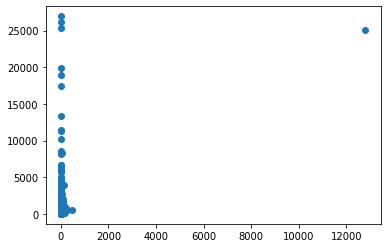

In [388]:
plt.scatter(X_train['additional_fare'],X_train['fare'])

In [14]:

outlier_dist_row = X_train.loc[X_train['additional_fare']>12000].index
outlier_dist_row


Int64Index([209365576], dtype='int64', name='tripid')

In [0]:
X_train.drop(outlier_dist_row,inplace=True)

In [0]:
##################### distance

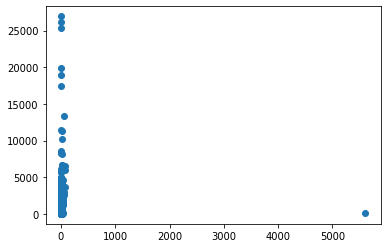

In [1645]:
plt.scatter(X_train['distance'],X_train['fare'])

In [16]:
outlier_dist_row = X_train.loc[X_train['distance']>5000].index
outlier_dist_row

Int64Index([190167541], dtype='int64', name='tripid')

In [0]:
X_train.drop(outlier_dist_row,inplace=True)

In [0]:
########### meter_waiting_till_pickup

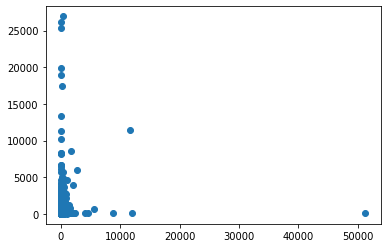

In [961]:
#plt.scatter(X_train['meter_waiting_till_pickup'],X_train['fare'])

In [18]:

outlier_waiting_till_pickup_row = X_train.loc[X_train['meter_waiting_till_pickup']>6000]
outlier_waiting_till_pickup_row


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,,
191056435,10.5,80.0,80.0,0.0000,51288.0,60.50,correct,120,1.583644
193341290,10.5,154423.0,121319.0,7012.2382,11722.0,11503.81,incorrect,67980,4.350098
193827380,10.5,83.0,73.0,0.0000,8800.0,60.50,correct,120,1.703314
205639292,10.5,98.0,0.0,0.0000,11944.0,60.50,correct,120,3.503663


In [0]:
#ids = X_train.index[['191056435','193827380','205639292']]
X_train.drop(191056435,inplace=True)
X_train.drop(193827380,inplace=True)
X_train.drop(205639292,inplace=True)


In [0]:
###############   meter_waiting_fare

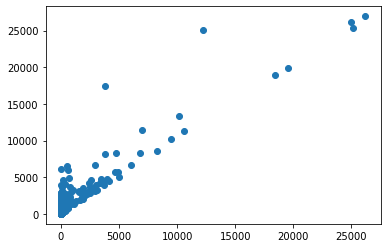

In [14]:
plt.scatter(X_train['meter_waiting_fare'],X_train['fare'])

In [20]:
outlier_waiting_time = X_train.loc[X_train['fare']>15000]
outlier_waiting_time

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,,
192121471,10.5,435397.0,435308.0,25098.4362,39.0,25315.09,incorrect,3360,1.074735
194554416,10.5,339351.0,339312.0,19570.7332,44.0,19865.46,incorrect,80160,5.830278
195593822,10.5,442190.0,431741.0,24954.6298,7.0,26098.75,incorrect,10200,3.395979
199689558,10.5,316978.0,316725.0,18465.0675,37.0,18962.60,incorrect,57780,8.357869
200943864,10.5,91344.0,90026.0,3810.2338,121.0,17499.49,incorrect,4920,1.603449
210573839,10.5,453872.0,453650.0,26198.6014,361.0,26945.99,correct,21840,10.702709


In [0]:
X_train.drop(210573839,inplace=True)


In [0]:
X_train.drop('duration',axis = 1,inplace=True)


In [23]:
X_train

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,
189123628,10.5,56.0,0.0000,64.0,270.32,correct,840,5.089572
189125358,10.5,47.0,0.0000,134.0,197.85,correct,780,3.166069
189125719,10.5,80.0,0.0000,61.0,301.64,correct,1080,6.301436
189127273,10.5,271.0,15.6638,68.0,82.30,correct,600,0.861405
189128020,NaN,NaN,NaN,NaN,358.39,correct,1020,8.142667
...,...,...,...,...,...,...,...,...
213803193,10.5,93.0,5.4219,451.0,198.26,correct,840,2.104054
213812756,10.5,428.0,0.0000,39.0,581.23,correct,2160,10.861554
213813930,10.5,9.0,0.0000,110.0,76.20,correct,240,1.044862


In [0]:

num_rows=X_train.shape[0]
li =[]

for i in range(num_rows):
  if X_train.iloc[i]['meter_waiting'] >  X_train.iloc[i]['calc_duration'] and  X_train.iloc[i]['label'] == 'correct' :
    li.append(i)


In [25]:
X_train.iloc[li]

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,
189192436,10.5,21.0,0.0000,289.0,60.50,correct,0,0.023820
189213407,5.0,162277.0,9460.7491,0.0,10264.42,correct,76380,12.987443
189302363,5.0,83.0,4.8389,0.0,64.83,correct,60,0.000000
189326852,10.5,35.0,0.0000,81.0,394.62,correct,0,8.219985
189679466,10.5,30.0,0.0000,7.0,60.50,correct,0,0.037058
...,...,...,...,...,...,...,...,...
211959838,10.5,145.0,0.0000,393.0,437.95,correct,120,8.849337
212525755,10.5,11.0,0.0000,78.0,60.50,correct,0,1.045064
212896193,10.5,23.0,0.0000,50.0,141.13,correct,0,2.510341


In [0]:
X_train.drop(X_train.index[li],inplace=True)

In [27]:
num_rows=X_train.shape[0]
li =[]

for i in range(num_rows):
  if X_train.iloc[i]['distance'] == 0  and X_train.iloc[i]['meter_waiting'] == 0 and X_train.iloc[i]['fare'] > 0:
    li.append(i)
li    

[15752]

In [28]:
X_train.iloc[li]

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,
212078793,5.0,0.0,0.0,0.0,60.0,correct,60,0.0


In [0]:
X_train.drop(X_train.index[li],inplace=True)

In [0]:
######################## 

In [0]:
num_rows=X_train.shape[0]
li = []
for i in range(num_rows):
  if X_train.iloc[i].isna().sum() > 0 and X_train.iloc[i]['label']=='incorrect':
    li.append(i)

In [31]:
X_train.iloc[li]

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,
189157607,10.5,1686.0,97.4508,29.0,NaN,incorrect,2460,2.280035
189164806,10.5,2689.0,146.9854,69.0,NaN,incorrect,780,2.700387
189164831,NaN,NaN,NaN,NaN,NaN,incorrect,480,2.432922
189231599,NaN,NaN,NaN,NaN,196.50,incorrect,900,2.441577
189393356,NaN,NaN,NaN,NaN,188.71,incorrect,1560,1.282278
...,...,...,...,...,...,...,...,...
213449192,NaN,NaN,NaN,NaN,NaN,incorrect,780,4.211012
213510465,NaN,NaN,NaN,NaN,NaN,incorrect,60,0.022506
213538831,NaN,NaN,NaN,NaN,NaN,incorrect,4560,0.023796


In [1187]:
X_train.loc[X_train['label']=='incorrect'].describe()

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,drop_lat,drop_lon,fare,calc_duration,distance
count,1623.000000,1623.000000,1623.000000,1623.000000,1772.000000,1772.000000,1635.000000,1772.000000,1772.000000
mean,17.905619,3213.540357,175.873207,159.086876,6.980930,80.026081,629.681468,2974.740406,4.674357
std,25.170206,22668.207477,1308.223080,378.684937,0.208991,0.267377,1527.425984,8381.466519,5.751879
min,0.000000,0.000000,0.000000,0.000000,5.998940,79.819900,0.000000,0.000000,0.000000
25%,10.500000,28.000000,0.000000,38.000000,6.867337,79.872600,111.125000,360.000000,0.955811
50%,10.500000,130.000000,0.000000,93.000000,6.921200,79.905600,357.670000,1020.000000,2.943514
75%,10.500000,543.000000,15.461500,178.500000,7.077193,79.981625,627.195000,2400.000000,6.670741
max,450.820000,435308.000000,25098.436200,11722.000000,7.591890,80.751100,26098.750000,86100.000000,79.171036


In [588]:
X_train.loc[X_train['label']=='incorrect'].mode()


,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
0,10.5,0.0,0.0,8.0,60.5,incorrect,60.0,0.005556
1,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN


In [590]:
X_train.loc[X_train['label']=='incorrect'].mean()


additional_fare                18.234370
meter_waiting                3239.885696
meter_waiting_fare            176.858910
meter_waiting_till_pickup     162.022208
fare                          648.362858
calc_duration                3081.214286
distance                        4.811506
dtype: float64

In [589]:
X_train.loc[X_train['label']=='correct'].mode()


,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
0,10.5,0.0,0.0,0.0,60.5,correct,600,0.0


In [591]:
X_train.loc[X_train['label']=='correct'].mean()


additional_fare                12.445516
meter_waiting                 312.715915
meter_waiting_fare             14.354179
meter_waiting_till_pickup     102.850691
fare                          275.732857
calc_duration                1377.350133
distance                        4.512941
dtype: float64

In [413]:
X_train.loc[X_train['label']=='incorrect'].isna().sum() > 0


additional_fare               True
meter_waiting                 True
meter_waiting_fare            True
meter_waiting_till_pickup     True
fare                          True
label                        False
calc_duration                False
distance                     False
dtype: bool

In [0]:
num_rows=X_train.shape[0]

for row in X_train.itertuples():
  if row.label == 'incorrect':
   
    
    if pd.isna(row.additional_fare):
      #X_train.iloc[i]['additional_fare'] = 10.5      
      X_train.at[row.Index, 'additional_fare'] = 18.234370
  
    if pd.isna(row.meter_waiting):
      #X_train.iloc[i]['meter_waiting'] = 0.0
      X_train.at[row.Index, 'meter_waiting'] = 3239.885696

    if pd.isna(row.meter_waiting_fare) :
      #X_train.iloc[i]['meter_waiting_fare'] = 0.0
      X_train.at[row.Index, 'meter_waiting_fare'] = 176.858910

    if pd.isna(row.meter_waiting_till_pickup) :
      #X_train.iloc[i]['meter_waiting_till_pickup'] = 8.0
      X_train.at[row.Index, 'meter_waiting_till_pickup'] = 162.022208

    if pd.isna(row.fare) :
      #X_train.iloc[i]['fare'] = 60.5
      X_train.at[row.Index, 'fare'] =  648.362858

 


In [0]:
num_rows=X_train.shape[0]
li = []
for i in range(num_rows):
  if X_train.iloc[i].isna().sum() > 0 and X_train.iloc[i]['label']=='incorrect':
    li.append(i)


In [34]:
X_train.iloc[li] #chek all are replaced correctly

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,


In [1734]:
X_train

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,
189123628,10.5,56.0,0.0000,64.0,270.32,correct,840,5.089572
189125358,10.5,47.0,0.0000,134.0,197.85,correct,780,3.166069
189125719,10.5,80.0,0.0000,61.0,301.64,correct,1080,6.301436
189127273,10.5,271.0,15.6638,68.0,82.30,correct,600,0.861405
189128020,NaN,NaN,NaN,NaN,358.39,correct,1020,8.142667
...,...,...,...,...,...,...,...,...
213803193,10.5,93.0,5.4219,451.0,198.26,correct,840,2.104054
213812756,10.5,428.0,0.0000,39.0,581.23,correct,2160,10.861554
213813930,10.5,9.0,0.0000,110.0,76.20,correct,240,1.044862


In [0]:
num_rows=X_train.shape[0]
li =[]

for i in range(num_rows):
  if X_train.iloc[i]['label'] == 'correct'  and X_train.iloc[i].isna().sum() >=3:
    li.append(i)
 

In [36]:
len(li)

53

In [0]:
X_train.drop(X_train.index[li],inplace=True)

In [0]:
X_train['label'] = X_train['label'].replace({'correct':1 , 'incorrect':0})

In [39]:
M = X_train.loc[X_train['label']==1].mean()
M

additional_fare                12.445516
meter_waiting                 312.715915
meter_waiting_fare             14.354179
meter_waiting_till_pickup     102.850691
fare                          275.711930
label                           1.000000
calc_duration                1376.465068
distance                        4.513026
dtype: float64

In [0]:
X_train = X_train.fillna(M)

In [41]:
X_train

,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,calc_duration,distance
tripid,,,,,,,,
189123628,10.5,56.0,0.0000,64.0,270.32,1,840,5.089572
189125358,10.5,47.0,0.0000,134.0,197.85,1,780,3.166069
189125719,10.5,80.0,0.0000,61.0,301.64,1,1080,6.301436
189127273,10.5,271.0,15.6638,68.0,82.30,1,600,0.861405
189129552,10.5,182.0,0.0000,112.0,1065.02,1,3420,24.191841
...,...,...,...,...,...,...,...,...
213803193,10.5,93.0,5.4219,451.0,198.26,1,840,2.104054
213812756,10.5,428.0,0.0000,39.0,581.23,1,2160,10.861554
213813930,10.5,9.0,0.0000,110.0,76.20,1,240,1.044862


In [0]:
def split_train_val(X_train):
  X_train_0 = X_train.loc[X_train['label'] == 0]
  X_train_1 = X_train.loc[X_train['label'] == 1]



  val_0 = X_train_0.sample(n=300,random_state=100)
  train_0 = X_train_0.drop(val_0.index)

  val_1 = X_train_1.sample(n=300,random_state=100)
  train_1 = X_train_1.drop(val_1.index)

  validation_set = pd.concat([val_0,val_1],axis=0)
  validation_set = validation_set.sample(frac=1)

  train_set = pd.concat([train_0,train_1],axis=0)
  train_set = train_set.sample(frac=1)

  train_set_y = train_set['label']
  train_set_x = train_set.drop('label', axis=1)

  validation_set_y = validation_set['label']
  validation_set_x = validation_set.drop('label', axis=1)

  return train_set_x, train_set_y,validation_set_x, validation_set_y

In [0]:
train_set_x, train_set_y,validation_set_x, validation_set_y = split_train_val(X_train)

In [0]:
scaler = MinMaxScaler()
scaler.fit(train_set_x)

scaled_train_x = scaler.transform(train_set_x)
scaled_validation_x = scaler.transform(validation_set_x)

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [0]:
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=scaled_train_x.shape[1], activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
weights = {0:1,1:1}

In [49]:
# fit the keras model on the 24
history = model.fit(scaled_train_x, train_set_y, epochs=40, batch_size=15,validation_split=0.33,class_weight=weights)

Train on 11003 samples, validate on 5420 samples
Epoch 1/40
11003/11003 [==============================] - 2s 184us/step - loss: 0.2864 - accuracy: 0.9149 - val_loss: 0.2558 - val_accuracy: 0.9188
Epoch 2/40
11003/11003 [==============================] - 2s 146us/step - loss: 0.2543 - accuracy: 0.9167 - val_loss: 0.2293 - val_accuracy: 0.9240
Epoch 3/40
11003/11003 [==============================] - 2s 145us/step - loss: 0.2325 - accuracy: 0.9263 - val_loss: 0.2249 - val_accuracy: 0.9314
Epoch 4/40
11003/11003 [==============================] - 2s 144us/step - loss: 0.2072 - accuracy: 0.9378 - val_loss: 0.2271 - val_accuracy: 0.9386
Epoch 5/40
11003/11003 [==============================] - 2s 147us/step - loss: 0.1937 - accuracy: 0.9428 - val_loss: 0.1740 - val_accuracy: 0.9472
Epoch 6/40
11003/11003 [==============================] - 2s 146us/step - loss: 0.1802 - accuracy: 0.9463 - val_loss: 0.1591 - val_accuracy: 0.9513
Epoch 7/40
11003/11003 [==============================] - 2s 14

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


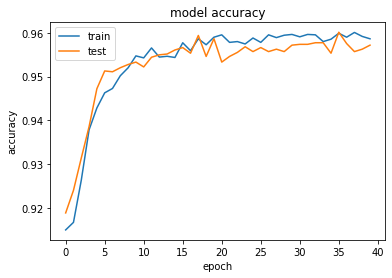

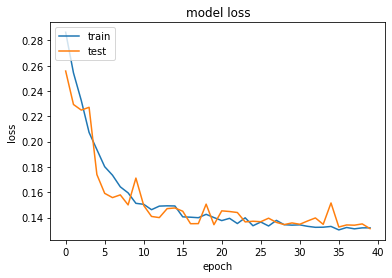

In [50]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(scaled_validation_x )

In [0]:
class_preds=[]
for pred in preds:
  if pred>0.56:
    class_preds.append(1)
  else:
    class_preds.append(0)

In [56]:

from sklearn.metrics import f1_score

f1 = f1_score(validation_set_y, class_preds, average='macro')
f1

0.8416711356265482

In [57]:

confusion_mat = confusion_matrix(validation_set_y, class_preds)
confusion_mat

array([[210,  90],
       [  3, 297]])

In [0]:
#################################################################################################################################################

In [0]:
import pickle
f = open('/content/drive/My Drive/Ride_Fare/model_3_1_weight_155z_242o','wb')
pickle.dump(model,f)

In [0]:
############# better
import pickle
f = open('/content/drive/My Drive/Ride_Fare/model_2_1_weight_160z_243o','wb')
pickle.dump(model,f)

In [0]:
############# better
import pickle
f = open('/content/drive/My Drive/Ride_Fare/model_1_1_weight_210z_298o','wb')
pickle.dump(model,f)

In [0]:
############# better
import pickle
f = open('/content/drive/My Drive/Ride_Fare/model_2_1_weight_178z_243o','wb')
pickle.dump(model,f)

In [0]:
################ open pickle file
with open('/content/drive/My Drive/Ride_Fare/model_2_1_weight_160z_243o', "rb") as f:
    myobj = pickle.load(f)

In [0]:
###################################################################################################

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/Ride_Fare/test.csv',index_col="tripid")

In [550]:
test_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [0]:
num_rows=test_df.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(test_df.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(test_df.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

test_df['calc_duration'] = duration_list


In [0]:
test_df = test_df.drop('drop_time',axis = 1)
test_df = test_df.drop('pickup_time',axis = 1)
test_df = test_df.drop('duration',axis = 1)

In [0]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(pick_lon,pick_lat,drop_lon,drop_lat):
    lon1 = pick_lon
    lat1 = pick_lat
    lon2 =drop_lon
    lat2 = drop_lat

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c

    return km

In [0]:
########### distance harvesian

num_rows=test_df.shape[0]
distance_list = []

for i in range(num_rows):
  pick_lon = test_df.iloc[i]['pick_lon'] 
  pick_lat = test_df.iloc[i]['pick_lat'] 
  drop_lon =  test_df.iloc[i]['drop_lon']
  drop_lat =  test_df.iloc[i]['drop_lat']
  dist = haversine(pick_lon,pick_lat,drop_lon,drop_lat)
  distance_list.append(dist)

test_df['distance'] = distance_list

In [0]:
test_df.drop('pick_lat',axis = 1,inplace=True)
test_df.drop('pick_lon',axis = 1,inplace=True)
#X_train.drop('drop_lat',axis = 1,inplace=True)
#X_train.drop('drop_lon',axis = 1,inplace=True)


In [942]:
test_df.isna().any()

additional_fare              False
meter_waiting                False
meter_waiting_fare           False
meter_waiting_till_pickup    False
drop_lat                     False
drop_lon                     False
fare                         False
calc_duration                False
distance                     False
dtype: bool

In [0]:
test_df = scaler.transform(test_df)

In [0]:
################################3 predict from model

In [0]:
with open('/content/drive/My Drive/Ride_Fare/model_1_1_weight_210z_298o', "rb") as f:
    model = pickle.load(f)

In [0]:
### NN
test_preds = model.predict(test_df)

In [946]:
test_preds

array([[0.99353904],
       [0.956662  ],
       [0.9892409 ],
       ...,
       [0.9958167 ],
       [0.98450637],
       [0.9915622 ]], dtype=float32)

In [947]:
submission_df = pd.read_csv('/content/drive/My Drive/Ride_Fare/sample_submission.csv',index_col="tripid")
submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,0
213294622,1
213298687,1


In [0]:
class_preds=[]
for pred in test_preds:
  if pred>0.7:
    class_preds.append(1)
  else:
    class_preds.append(0)

In [949]:

# Make sure we have the rows in the same order


# Save predictions to submission data frame
submission_df["prediction"] = class_preds

submission_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [0]:
# 1_1 clas wight, H= all data, L = part
submission_df.to_csv('/content/drive/My Drive/Ride_Fare/ride_fare_submission_1_1_weight_210z_298o.csv', index=True)

In [950]:
submission_df['prediction'].value_counts()

1    8148
0     428
Name: prediction, dtype: int64